# **Lista 1 de Processamento de Imagens**

Professora: Mylene Farias

Aluna: Daniele Dias

matrícula: 20/0081691

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
# Check current working directory.
print(os.getcwd())
os.chdir('/content/drive/MyDrive/processamento_imagens/Lista 01')
# Check current working directory.
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/processamento_imagens/Lista 01
/content/drive/MyDrive/processamento_imagens/Lista 01


# **Parte 1**

> Para cada item foi utilizado uma maneira para resolver o problema, todas as funções usadas estão presentes nesse bloco.

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from scipy import ndimage
#from skimage import data
#from skimage.color import rgb2gray
import math
import time

#####################################
#### my functions and my class ######
#####################################

# Function to calculate the nearest neighbor scaling
def nearestNeighbor(outputI, color_img, scale, row, col):
  for k in range(0, int(scale[0]*row)):  
    for l in range(0, int(scale[1]*col)):
      # map from output image location to input image location
      jj= int( round( float(l) * float(col) / (float(scale[1]) * float(col) ) ) ) 
      ii= int( round( float(k) * float(row) / (float(scale[0]) * float(row) ) ) )
      # If the pixel value is over the range [0,255]
      ii = min( ii, int(row)-1)
      jj = min( jj, int(col)-1)
      # assign value
      outputI[k][l] = color_img[ii][jj]
  return outputI

#function to calculate PSNR - peak-signal-to-noise-ratio
def calculate_psnr(img1, img2):
    # img1 and img2 have range [0, 255]
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))

#Creating the Output class that contains each scaled image as an object  
class Output:
  def __init__(self, name, loop):
    self.name = name
    self.loop = loop

#Function to calculte Bilinear interpolation
def interpolateBilinear(outputI, color_img, scale, row, col):
  H = (scale[0] * row)
  W = (scale[1] * col)
  row_s = float(row/H)
  col_s = float(col/W)
  for k in range(0, int(scale[0]*row)):  
    y = (row_s * k) + (0.5 * (1 - 1/scale[0]))
    for l in range(0, int(scale[1]*col)):
        x = (col_s * l) + (0.5 * (1 - 1/scale[1]))

        #Values accepted in the range [0,255]

        #For x
        if x<0:
          x = 0
        if x > (float(row)-2):
          x = float(row)-2
        x1= int(np.floor(x)) 
        x2=x1+1

        #For y
        if y<0:
          y = 0  
        if y > (float(col)-2):
          y = float(col)-2 
        y1 = int(np.floor(y))
        y2 = y1 + 1

        #4 Neighboring Pixels
        NP1 = color_img[y1][x1]
        NP2 = color_img[y1][x2]
        NP3 = color_img[y2][x1] 
        NP4 = color_img[y2][x2]

        #4 Pixels Weights
        PW1 = (y2-y)*(x2-x)
        PW2 = (y2-y)*(x-x1)
        PW3 = (x2-x)*(y-y1)
        PW4 = (y-y1)*(x-x1)

        #Image output
        outputI[k][l] = PW1 * NP1 + PW2 * NP2 + PW3 * NP3 + PW4 * NP4           
  return outputI

>Bloco para abrir a imagem da Lenna.

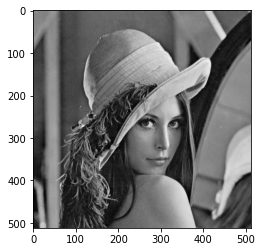

In [ ]:
#name of image
path2Image = 'lennaCinza.png'
color_img = cv2.imread(path2Image,0) # pass 0 to read grayscale image
input = color_img
plt.imshow(color_img,cmap=plt.cm.gray)
# I can use rgb2gray like in matlab

## **Interpolação Vizinho-mais-Próximo**

Para o item 1.1, foi desenvolvido uma função chamada 'nearestNeighbor', que é chamada dentro de um *loop* que reduz a imagem em fator de 2 até chegar ao 1/16 do seu tamanho original, logo em seguida ela já retorna a imagem ao tamanho original, também em fator de 2. Cada escalonamento é salvo em uma lista, e ao final é feito a análise de qualidade da imagem final resultante.

In [ ]:
t0 = time.time  ()
#vector of all redimension required
redimension = np.array([1/2, 1/2, 1/2, 1/2,2,2,2,2])
#create an output list
results = []
#This loop reduces image by factor 2 until 16 and increases
#until original size.
for m in range(0, redimension.size):
  scale = (redimension[m], redimension[m])
  # dimensions of the image
  row, col = color_img.shape
  # allocating memory to the scaled image
  outputI = np.zeros((int(scale[0]*row), int(scale[1]*col)))
  output = nearestNeighbor(outputI, color_img, scale, row, col)
  color_img = output
  out_img = Output(output,m)
  results.append(out_img)
t1 = time.time()

total = t1-t0
#Calculate PNSR
pnsr = calculate_psnr(input, results[7].name)
print(total, pnsr)

1.2832233905792236 18.780847483395366


**Resultados**

1. O tempo para processar as imagens foi de 1,35s e o PNSR é 18,78.  




Text(0.5, 1.0, 'Original Size')

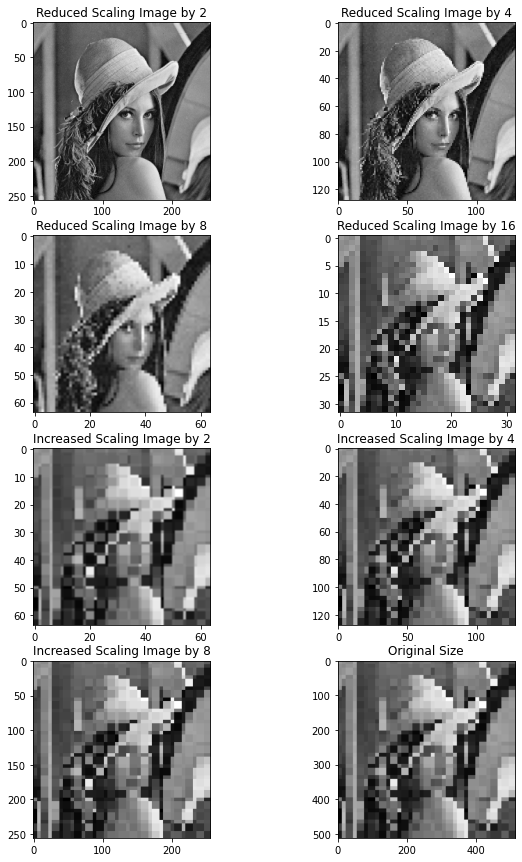

In [ ]:
#plot all results
fig = plt.figure(figsize=(10,15))
plt.subplot(4, 2, 1)
plt.imshow(results[0].name,cmap=plt.cm.gray)
plt.title("Reduced Scaling Image by 2")

plt.subplot(4, 2, 2)
plt.imshow(results[1].name,cmap=plt.cm.gray)
plt.title("Reduced Scaling Image by 4")

plt.subplot(4, 2, 3)
plt.imshow(results[2].name,cmap=plt.cm.gray)
plt.title("Reduced Scaling Image by 8")

plt.subplot(4, 2, 4)
plt.imshow(results[3].name,cmap=plt.cm.gray)
plt.title("Reduced Scaling Image by 16")

plt.subplot(4, 2, 5)
plt.imshow(results[4].name,cmap=plt.cm.gray)
plt.title("Increased Scaling Image by 2")

plt.subplot(4, 2, 6)
plt.imshow(results[5].name,cmap=plt.cm.gray)
plt.title("Increased Scaling Image by 4")

plt.subplot(4, 2, 7)
plt.imshow(results[6].name,cmap=plt.cm.gray)
plt.title("Increased Scaling Image by 8")

plt.subplot(4, 2, 8)
plt.imshow(results[7].name,cmap=plt.cm.gray)
plt.title("Original Size")


## **Interpolação Bilinear**

Para o item 1.2, se utiliza a mesma lógica do item 1.1, porém com a função 'interpolateBilinear'.

In [ ]:
#Original image
color_img = cv2.imread(path2Image,0)
t0 = time.time  ()
#create an output list
resultsBilinear = []
#This loop reduces image by factor 2 until 16 and increases
#until original size.
for m in range(0, redimension.size):
  scale = (redimension[m], redimension[m])
  # dimensions of the image
  row, col = color_img.shape
  # allocating memory to the scaled image
  outputI = np.zeros((int(scale[0]*row), int(scale[1]*col)))
  output = interpolateBilinear(outputI, color_img, scale, row, col)
  color_img = output
  out_img = Output(output,m)
  resultsBilinear.append(out_img)
t1 = time.time()

total = t1-t0
#Calculate PNSR
pnsr = calculate_psnr(input, resultsBilinear[7].name)
print(total,pnsr)

4.711694002151489 20.64577457442382


**Resultados**

2. O tempo para processar as imagens foi de 4,89s e o PNSR é 20,62.  

Text(0.5, 1.0, 'Original Size')

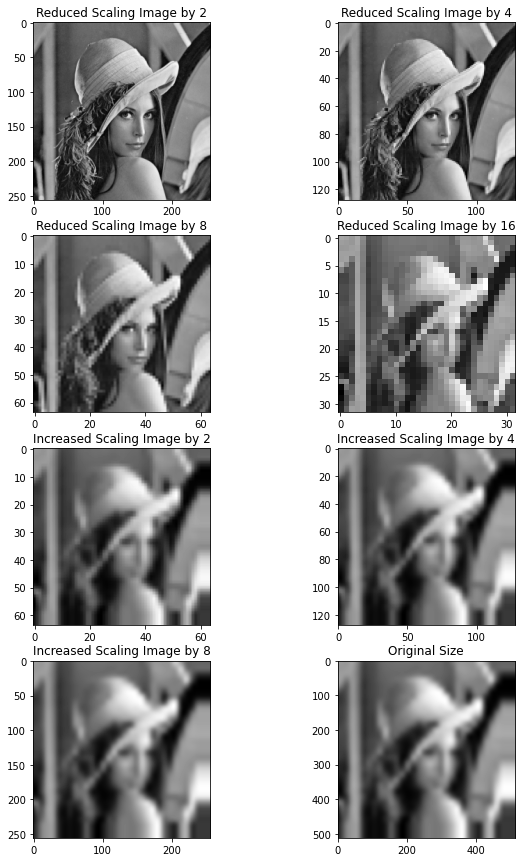

In [ ]:
#plot all results
fig = plt.figure(figsize=(10,15))
plt.subplot(4, 2, 1)
plt.imshow(resultsBilinear[0].name,cmap=plt.cm.gray)
plt.title("Reduced Scaling Image by 2")

plt.subplot(4, 2, 2)
plt.imshow(resultsBilinear[1].name,cmap=plt.cm.gray)
plt.title("Reduced Scaling Image by 4")

plt.subplot(4, 2, 3)
plt.imshow(resultsBilinear[2].name,cmap=plt.cm.gray)
plt.title("Reduced Scaling Image by 8")

plt.subplot(4, 2, 4)
plt.imshow(resultsBilinear[3].name,cmap=plt.cm.gray)
plt.title("Reduced Scaling Image by 16")

plt.subplot(4, 2, 5)
plt.imshow(resultsBilinear[4].name,cmap=plt.cm.gray)
plt.title("Increased Scaling Image by 2")

plt.subplot(4, 2, 6)
plt.imshow(resultsBilinear[5].name,cmap=plt.cm.gray)
plt.title("Increased Scaling Image by 4")

plt.subplot(4, 2, 7)
plt.imshow(resultsBilinear[6].name,cmap=plt.cm.gray)
plt.title("Increased Scaling Image by 8")

plt.subplot(4, 2, 8)
plt.imshow(resultsBilinear[7].name,cmap=plt.cm.gray)
plt.title("Original Size")

## **Função OpenCV**

Para o item 1.3, utilizei a mesma lógica utilizada nos itens anteriores, porém com uma função nativa. Para que pudesse haver comparação entre cada item, a solução está separada entre a Interpolação do Vizinho-mais-próximo e o Bilinear.

**Interpolação Vizinho-mais-próximo**

In [ ]:
#Original image
color_img = cv2.imread(path2Image,0)
t0 = time.time  ()
#create an output list
resultsOpenCV = []
#This loop reduces image by factor 2 until 16 and increases
#until original size.
for m in range(0, redimension.size):
  scale = (redimension[m], redimension[m])
  # dimensions of the image
  row, col = color_img.shape
  # allocating memory to the scaled image
  output = cv2.resize(color_img, (int(scale[0]*row),int(scale[1]*col)), interpolation=cv2.INTER_NEAREST)
  color_img = output
  out_img = Output(output,m)
  resultsOpenCV.append(out_img)
t1 = time.time()

total = t1-t0
#Calculate PNSR
pnsr = calculate_psnr(input, resultsOpenCV[7].name)
print(total,pnsr)

0.013994693756103516 16.580568144877827


**Resultados**

1. O tempo para processar as imagens foi de 0,01s e o PNSR é 16,58. 

Text(0.5, 1.0, 'Original Size')

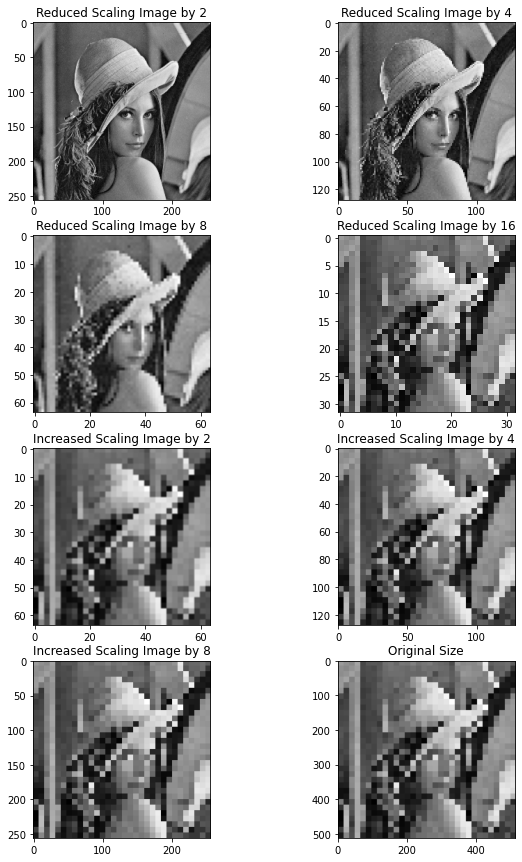

In [ ]:
#plot all results
fig = plt.figure(figsize=(10,15))
plt.subplot(4, 2, 1)
plt.imshow(resultsOpenCV[0].name,cmap=plt.cm.gray)
plt.title("Reduced Scaling Image by 2")

plt.subplot(4, 2, 2)
plt.imshow(resultsOpenCV[1].name,cmap=plt.cm.gray)
plt.title("Reduced Scaling Image by 4")

plt.subplot(4, 2, 3)
plt.imshow(resultsOpenCV[2].name,cmap=plt.cm.gray)
plt.title("Reduced Scaling Image by 8")

plt.subplot(4, 2, 4)
plt.imshow(resultsOpenCV[3].name,cmap=plt.cm.gray)
plt.title("Reduced Scaling Image by 16")

plt.subplot(4, 2, 5)
plt.imshow(resultsOpenCV[4].name,cmap=plt.cm.gray)
plt.title("Increased Scaling Image by 2")

plt.subplot(4, 2, 6)
plt.imshow(resultsOpenCV[5].name,cmap=plt.cm.gray)
plt.title("Increased Scaling Image by 4")

plt.subplot(4, 2, 7)
plt.imshow(resultsOpenCV[6].name,cmap=plt.cm.gray)
plt.title("Increased Scaling Image by 8")

plt.subplot(4, 2, 8)
plt.imshow(resultsOpenCV[7].name,cmap=plt.cm.gray)
plt.title("Original Size")


**Interpolação Bilinear**

In [ ]:
#Original image
color_img = cv2.imread(path2Image,0)
t0 = time.time  ()
#create an output list
resultsBilinearOpenCV = []
#This loop reduces image by factor 2 until 16 and increases
#until original size.
for m in range(0, redimension.size):
  scale = (redimension[m], redimension[m])
  # dimensions of the image
  row, col = color_img.shape
  # allocating memory to the scaled image
  output = cv2.resize(color_img, (int(scale[0]*row),int(scale[1]*col)), interpolation=cv2.INTER_LINEAR)
  color_img = output
  out_img = Output(output,m)
  resultsBilinearOpenCV.append(out_img)
t1 = time.time()

total = t1-t0
#Calculate PNSR
pnsr = calculate_psnr(input, resultsBilinearOpenCV[7].name)
print(total,pnsr)

0.001682281494140625 21.290255166864934


**Resultados**

2. O tempo para processar as imagens foi de 0,004s e o PNSR é 21,29. 

Text(0.5, 1.0, 'Original Size')

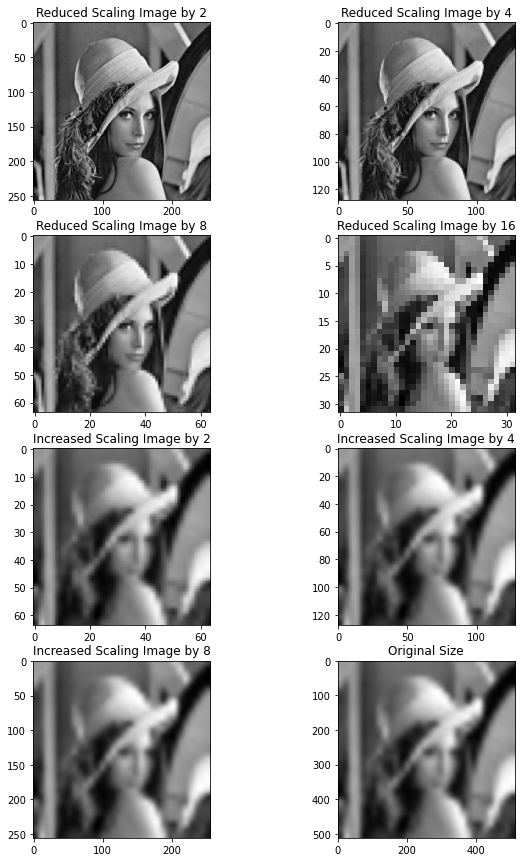

In [ ]:
#plot all results
fig = plt.figure(figsize=(10,15))
plt.subplot(4, 2, 1)
plt.imshow(resultsBilinear[0].name,cmap=plt.cm.gray)
plt.title("Reduced Scaling Image by 2")

plt.subplot(4, 2, 2)
plt.imshow(resultsBilinearOpenCV[1].name,cmap=plt.cm.gray)
plt.title("Reduced Scaling Image by 4")

plt.subplot(4, 2, 3)
plt.imshow(resultsBilinearOpenCV[2].name,cmap=plt.cm.gray)
plt.title("Reduced Scaling Image by 8")

plt.subplot(4, 2, 4)
plt.imshow(resultsBilinearOpenCV[3].name,cmap=plt.cm.gray)
plt.title("Reduced Scaling Image by 16")

plt.subplot(4, 2, 5)
plt.imshow(resultsBilinearOpenCV[4].name,cmap=plt.cm.gray)
plt.title("Increased Scaling Image by 2")

plt.subplot(4, 2, 6)
plt.imshow(resultsBilinearOpenCV[5].name,cmap=plt.cm.gray)
plt.title("Increased Scaling Image by 4")

plt.subplot(4, 2, 7)
plt.imshow(resultsBilinearOpenCV[6].name,cmap=plt.cm.gray)
plt.title("Increased Scaling Image by 8")

plt.subplot(4, 2, 8)
plt.imshow(resultsBilinearOpenCV[7].name,cmap=plt.cm.gray)
plt.title("Original Size")

> As função desenvolvidas tem um pior desempenho em relação a função nativa, o resultado de qualidade da interpolação vizinho-mais-próximo desenvolvida, pelo PNSR, tem uma qualidade maior do que a função nativa, porém a bilinear não.

# **Parte 2** 

**Ideia de Resolução**

> Sabe-se que a imagem par está corrompida, inclusive com valores negativos, então primeiramente fiz uma correção no histograma dessa imagem para todos os valores serem definidos entre 0 e 255.

> Após feita a correção, é retirado todos os valores que estavam corrompidos da imagem, e igualados à zero.

> Somente após isso, é feito o entrelaçamento das imagens par e ímpar.

> Partindo do pressuposto que os valores dos pixels próximos são relacionados, passei um filtro de média de tamanho 2x2 (já que as linhas são intercaladas e somente as linhas da imagem ímpar não são corrompidas). Desta forma, reduzindo as imperfeições causadas pela correção realizada na imagem par.

array da imagens de linhas pares:

Tipo =  float64 

Media dos valores =  -6.496390726949487e-16 

Desvio Padrão =  66.78682114008309 

Valor Maximo =  188.27678571428572 

Valor Minimo =  -115.74285714285715 

Total =  304.01964285714286 



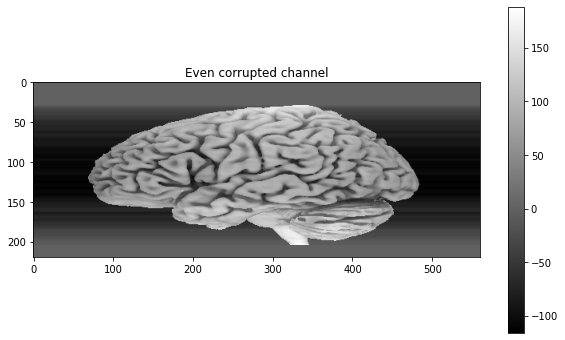

In [ ]:
from scipy.io import loadmat
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
from PIL import Image

# lendo os arquivos em mat da imagem de linhas pares e 
# transferindo apenas a matriz de dados do mat para um array
mat_even = loadmat('even_rows.mat')
img_mateven = mat_even['even_corrupted_channel']

print('array da imagens de linhas pares:\n')
print('Tipo = ', img_mateven.dtype,'\n')
print('Media dos valores = ', img_mateven.mean(),'\n')
print('Desvio Padrão = ', img_mateven.std(),'\n')
print('Valor Maximo = ', img_mateven.max(),'\n')
print('Valor Minimo = ', img_mateven.min(),'\n')
print('Total = ', (img_mateven.max()-img_mateven.min()), '\n')
plt.figure(figsize=(10, 6))
plt.imshow(img_mateven, cmap=plt.cm.gray)
plt.title('Even corrupted channel')
plt.colorbar()
# Dando uma olhada nos dados da matriz de linhas pares
# perceba que a matriz possui valores negativos
# logo, se for salvar o arquivo, é necessário tratar a possível presença de 
# valores negativos!


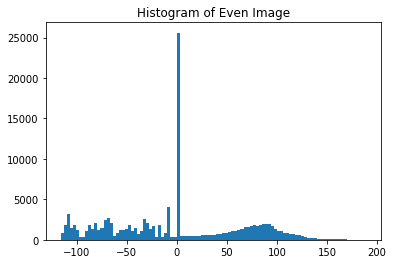

In [ ]:
#histogram of the corrupted image
#hist, bins = np.histogram(img_mateven.ravel(), 100, [img_mateven.min(),img_mateven.max()])
plt.hist([img_mateven.ravel()], bins = 100)
plt.title("Histogram of Even Image")
plt.show()

array da imagens de linhas ímpares:

Tipo =  uint8 

Media dos valores =  60.702597402597405 

Desvio Padrão =  78.45269581261365 

Valor Maximo =  207 

Valor Minimo =  0 



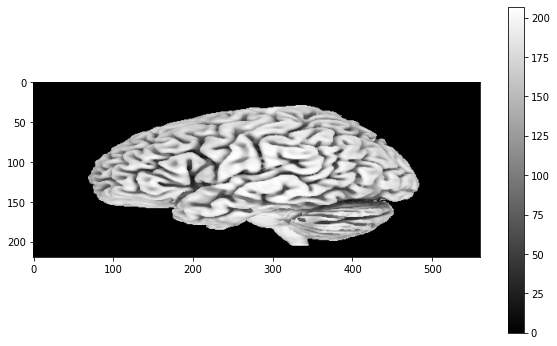

In [ ]:
# lendo os arquivos em mat da imagem de linhas pares e 
# transferindo apenas a matriz de dados do mat para um array
mat_odd = loadmat('odd_rows.mat')
img_matodd = mat_odd['odd_channel']
# Dando uma olhada nos dados da matriz de linhas ímpares
print('array da imagens de linhas ímpares:\n')
print('Tipo = ', img_matodd.dtype,'\n')
print('Media dos valores = ', img_matodd.mean(),'\n')
print('Desvio Padrão = ', img_matodd.std(),'\n')
print('Valor Maximo = ', img_matodd.max(),'\n')
print('Valor Minimo = ', img_matodd.min(),'\n')
plt.figure(figsize=(10, 6))
plt.imshow(img_matodd, cmap=plt.cm.gray)
plt.title('Odd channel')
plt.colorbar()


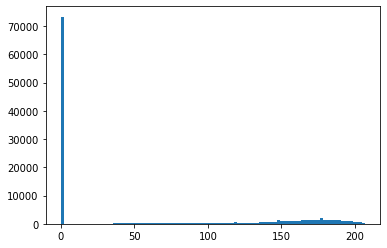

In [ ]:
#histogram of the odd image
#hist, bins = np.histogram(img_matodd.ravel(), 256, [img_matodd.min(),img_matodd.max()])
plt.hist([img_matodd.ravel()], bins = 100)
plt.show()

Valor Maximo =  255.0 

Valor Minimo =  0.0 

Media dos valores =  56.382615328241116 



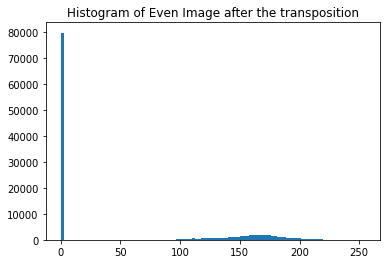

Text(0.5, 1.0, 'Interlaced Image with a Average Filter')

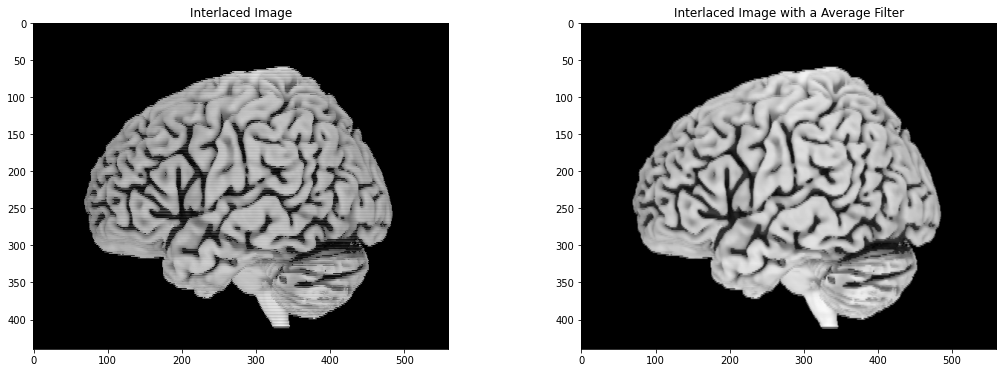

In [ ]:
img_list = np.array(img_mateven)
# record the original shape
shap = img_list.shape

# make a 1-dimensional view of img_list
flat_arr = img_list.ravel()

#Transpose the histogram to [0,255]
even = (flat_arr - img_mateven.min()) * (255 / (img_mateven.max()-img_mateven.min()))
for i in range(0, even.size):
  if flat_arr[i] <= 0:
    even[i] = 0

#Reshape to original matrix
even_ = even.reshape(shap)

#Even image correction parameters
print('Valor Maximo = ', even_.max(),'\n')
print('Valor Minimo = ', even_.min(),'\n')
print('Media dos valores = ', even_.mean(),'\n')

#histogram of the corrupted image
#hist, bins = np.histogram(even, 200)
plt.hist([even], bins = 100)
plt.title("Histogram of Even Image after the transposition")
plt.show()

#Interlace even and odd images
inter= np.zeros((shap[0]*2, shap[1]))
#for i in range(shap[0]):
#  inter[2*i, :]= even_[i,:]
#  inter[2*i+1, :]= img_matodd[i,:]
inter[::2,:] = even_
inter[1::2,:] = img_matodd

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1) 
plt.imshow(inter, cmap=plt.cm.gray)
plt.title("Interlaced Image")

#Average filter 2x2
filter =  np.ones((2, 2))
kernel_ = (filter / filter.size)
k2 = cv2.filter2D(inter, ddepth=-1, kernel = kernel_)

plt.subplot(1, 2, 2) 
plt.imshow(k2, cmap=plt.cm.gray)
plt.title("Interlaced Image with a Average Filter")

Valor Maximo =  224.92009444878445 

Valor Minimo =  0.0 

Media dos valores =  58.54260636541927 



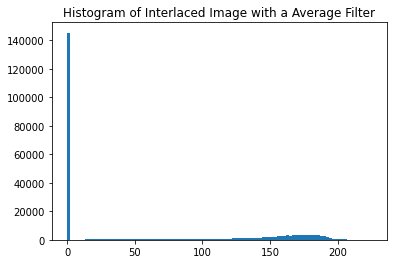

In [ ]:
# Interlaced Image with a Average Filter parameters
print('Valor Maximo = ', k2.max(),'\n')
print('Valor Minimo = ', k2.min(),'\n')
print('Media dos valores = ', k2.mean(),'\n')
#histogram of the corrupted image
#hist, bins = np.histogram(k2, 200)
plt.hist([k2.ravel()], bins = 100)
plt.title("Histogram of Interlaced Image with a Average Filter")
plt.show()